<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n20.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.685529,47.683874,-0.001307,117.368096,117.370518,-0.002423
1,0.0,1.0,78.804208,72.645879,-0.001129,161.448958,161.448856,0.000102
2,0.0,2.0,93.112056,40.245351,-0.001343,143.356064,143.356486,-0.000422
3,0.0,3.0,50.152409,75.878592,0.001398,136.032399,136.031642,0.000756
4,0.0,4.0,72.712769,79.853687,-0.000898,162.565557,162.565359,0.000198
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.768272,68.161767,-0.002049,121.927990,121.929731,-0.001741
19996,999.0,16.0,27.624057,93.651205,-0.000039,131.275223,131.274573,0.000650
19997,999.0,17.0,85.715536,87.953722,-0.001336,183.667921,183.669247,-0.001326
19998,999.0,18.0,76.302910,58.569058,-0.000088,144.871881,144.872093,-0.000212


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.685529,47.683874,-0.001307,117.368096,117.370518,-0.002423
1,0.0,1.0,78.804208,72.645879,-0.001129,161.448958,161.448856,0.000102
2,0.0,2.0,93.112056,40.245351,-0.001343,143.356064,143.356486,-0.000422
3,0.0,3.0,50.152409,75.878592,0.001398,136.032399,136.031642,0.000756
4,0.0,4.0,72.712769,79.853687,-0.000898,162.565557,162.565359,0.000198
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.768272,68.161767,-0.002049,121.927990,121.929731,-0.001741
19996,999.0,16.0,27.624057,93.651205,-0.000039,131.275223,131.274573,0.000650
19997,999.0,17.0,85.715536,87.953722,-0.001336,183.667921,183.669247,-0.001326
19998,999.0,18.0,76.302910,58.569058,-0.000088,144.871881,144.872093,-0.000212


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.685529,47.683874,-0.001307,117.368096,117.370518,-0.002423
1,0.0,1.0,78.804208,72.645879,-0.001129,161.448958,161.448856,0.000102
2,0.0,2.0,93.112056,40.245351,-0.001343,143.356064,143.356486,-0.000422
3,0.0,3.0,50.152409,75.878592,0.001398,136.032399,136.031642,0.000756
4,0.0,4.0,72.712769,79.853687,-0.000898,162.565557,162.565359,0.000198
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,43.768272,68.161767,-0.002049,121.927990,121.929731,-0.001741
19996,999.0,16.0,27.624057,93.651205,-0.000039,131.275223,131.274573,0.000650
19997,999.0,17.0,85.715536,87.953722,-0.001336,183.667921,183.669247,-0.001326
19998,999.0,18.0,76.302910,58.569058,-0.000088,144.871881,144.872093,-0.000212


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    59.685529  47.683874 -0.001307  117.368096  117.370518 -0.002423
      1.0    78.804208  72.645879 -0.001129  161.448958  161.448856  0.000102
      2.0    93.112056  40.245351 -0.001343  143.356064  143.356486 -0.000422
      3.0    50.152409  75.878592  0.001398  136.032399  136.031642  0.000756
      4.0    72.712769  79.853687 -0.000898  162.565557  162.565359  0.000198
...                ...        ...       ...         ...         ...       ...
999.0 15.0   43.768272  68.161767 -0.002049  121.927990  121.929731 -0.001741
      16.0   27.624057  93.651205 -0.000039  131.275223  131.274573  0.000650
      17.0   85.715536  87.953722 -0.001336  183.667921  183.669247 -0.001326
      18.0   76.302910  58.569058 -0.000088  144.871881  144.872093 -0.000212
      19.0   57.483367  81.086128  0.001282  148.570777  148.569233  0.001544

[20000 rows x 6 columns]

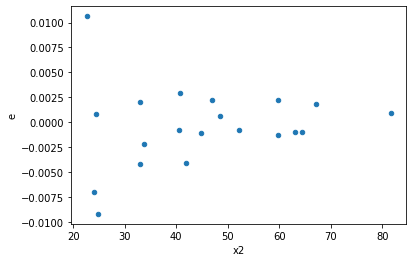

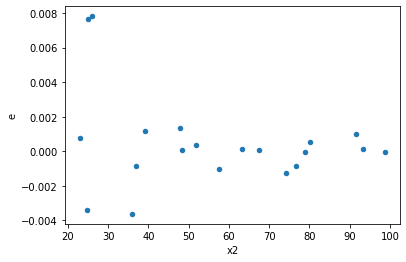

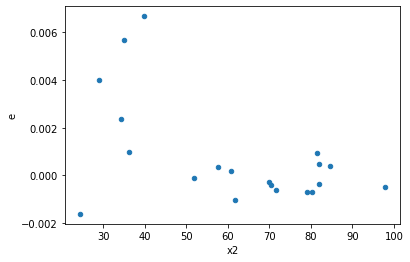

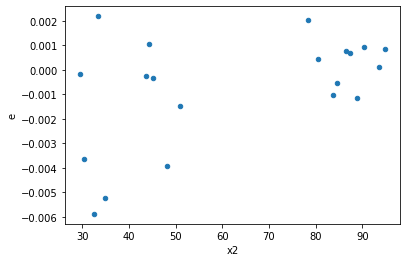

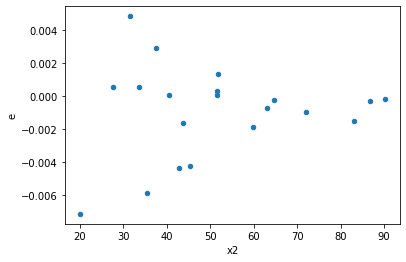

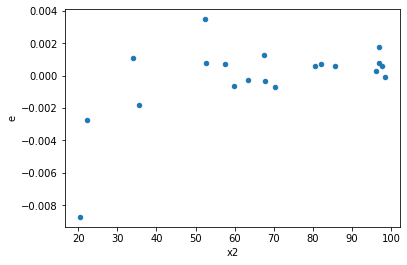

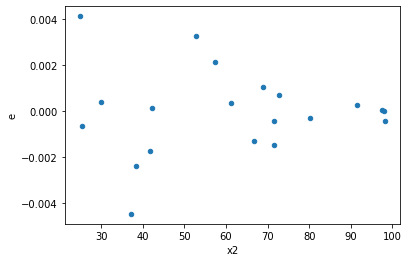

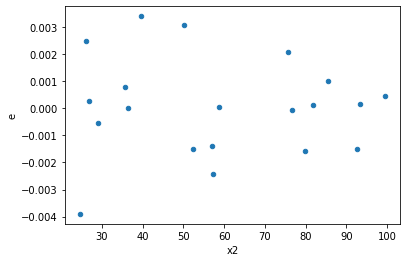

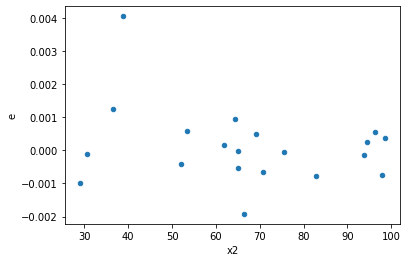

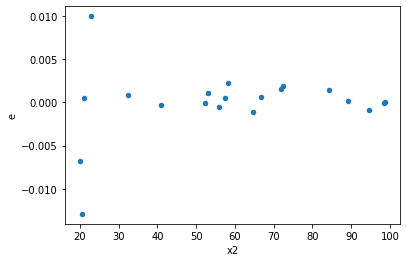

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,6.0,6.0,3.6954265724694884e-06,4.737345337100729e-06,6.159044287449147e-07,7.895575561834549e-07,1.281948171394723,0.7706796451369251,0.6146601774315374,0.38533982256846255,Reject005=1 : Homoscedasticity
57.0,6.0,6.0,3.1886612590018794e-06,3.5813352244810167e-06,5.314435431669799e-07,5.968892040801694e-07,1.123146967828766,0.8914897458964779,0.554255127051761,0.44574487294823895,Reject005=1 : Homoscedasticity
58.0,6.0,6.0,1.5817027148963763e-05,1.7962282319080598e-05,2.6361711914939605e-06,2.9937137198467663e-06,1.1356294801743056,0.8812423603445834,0.5593788198277083,0.4406211801722917,Reject005=1 : Homoscedasticity
72.0,6.0,6.0,1.6917470496824797e-05,3.6031181746233204e-05,2.819578416137466e-06,6.005196957705534e-06,2.129820870856303,0.3796533483272797,0.8101733258363601,0.18982667416363985,Reject005=1 : Homoscedasticity
78.0,6.0,6.0,5.389947828572014e-06,1.6521017077052286e-05,8.983246380953357e-07,2.753502846175381e-06,3.065153430516466,0.19866981823287566,0.9006650908835622,0.09933490911643783,Reject005=1 : Homoscedasticity
80.0,6.0,6.0,2.5913368079503896e-05,4.591359318339772e-05,4.318894679917316e-06,7.652265530566287e-06,1.771811099295616,0.5042651739914943,0.7478674130042529,0.25213258699574714,Reject005=1 : Homoscedasticity
81.0,6.0,6.0,9.065027264174034e-06,1.1394541559287493e-05,1.510837877362339e-06,1.8990902598812487e-06,1.2569781896100798,0.7883515296482491,0.6058242351758755,0.39417576482412453,Reject005=1 : Homoscedasticity
103.0,6.0,6.0,2.3035879272532207e-05,2.337457613888153e-05,3.839313212088701e-06,3.895762689813588e-06,1.014703014473304,0.9863170039825007,0.5068414980087497,0.49315850199125033,Reject005=1 : Homoscedasticity
109.0,6.0,6.0,1.3606545628649521e-05,1.4384145100877045e-05,2.26775760477492e-06,2.397357516812841e-06,1.0571489262190277,0.9479380825645058,0.5260309587177471,0.4739690412822529,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,1.2295998330104355e-05,3.0769059554783524e-06,2.0493330550173927e-06,5.12817659246392e-07,0.2502363673834557,0.11607244642904975,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,9.473650776448402e-05,1.0654987148067586e-05,1.5789417960747335e-05,1.7758311913445977e-06,0.1124697057079199,0.017659402197759817,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,5.859829925500709e-05,4.958704147380137e-06,9.766383209167848e-06,8.264506912300228e-07,0.08462198067901139,0.008421377400227697,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,7.648407523448296e-05,4.211293488656561e-06,1.2747345872413826e-05,7.018822481094269e-07,0.05506104997341844,0.0026248129619933372,Reject005=0 : Heteroscedasticity
4.0,6.0,6.0,1.8257179221912787e-05,8.629014359966097e-06,3.0428632036521312e-06,1.4381690599943495e-06,0.47263677784404434,0.38374408775981367,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,3.1273582310870364e-05,7.424553611497763e-06,5.212263718478394e-06,1.2374256019162938e-06,0.2374065605179189,0.10371546738665885,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,0.00018861167919415425,7.925862659160866e-06,3.1435279865692375e-05,1.3209771098601444e-06,0.04202212022619285,0.0012336294796216265,Reject005=0 : Heteroscedasticity
7.0,6.0,6.0,3.6954265724694884e-06,4.737345337100729e-06,6.159044287449147e-07,7.895575561834549e-07,1.281948171394723,0.7706796451369251,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,8.28626002547836e-05,4.39832476623993e-06,1.3810433375797268e-05,7.33054127706655e-07,0.05307973383306925,0.0023714006316358067,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    597
Reject005=1 : Homoscedasticity      403
Name: Result_test, dtype: int64